# Introduction à Qiskit (informatique quantique)

Bienvenue dans cette initiation à Qiskit ! Dans ce notebook, vous apprendrez les bases de l'informatique quantique et comment coder avec Qiskit, une bibliothèque Python dédiée à la programmation des ordinateurs quantiques.

### Ce que vous allez apprendre :
0. Qu'est-ce que l'informatique quantique ?
1. Ce qu'est un **qubit** et pourquoi il est différent d'un bit classique.
2. Comment utiliser **Qiskit** pour manipuler des qubits.
3. Les bases des **portes logiques quantiques** et des **mesures**.
4. Comment exécuter des calculs simples sur un simulateur quantique.

In [13]:
# Commençons par vérifier l'installation de qiskit
import qiskit
print(qiskit.__version__)

1.2.4


### Se connecter à un ordinateur quantique réel

IBM met à disposition des ordinateurs quantiques accessibles via le cloud. Pour les utiliser, vous devez créer un compte IBM Quantum (gratuit !) et obtenir une clé API.

Dans ce notebook, j'ai avons déjà configuré un fichier `.env` contenant la clé API, mais créez le votre, je ne vais pas vous donner ma clé !! Le code ci-dessous charge cette clé pour que nous puissions nous connecter à l'ordinateur quantique si nécessaire.


In [1]:
# charger la clé API depuis le fichier .env
import os
from dotenv import load_dotenv

load_dotenv()
# print(os.getenv('QISKIT_API_TOKEN'))

True

## Les bases de l'informatique quantique

Avant de commencer à coder, voici un aperçu des concepts clés de l'informatique quantique.

### 0. Qu'est-ce que l'informatique quantique ?

#### Pourquoi ça s'appelle comme ça ?

L'informatique quantique tire son nom de la **physique quantique**, qui est une branche de la physique étudiant les phénomènes à très petite échelle, comme les atomes et les particules subatomiques. À cette échelle, les règles de la physique classique (celles qu'on utilise pour comprendre les objets du quotidien) ne s'appliquent plus tout à fait. À la place, des phénomènes étranges, comme la **superposition** et l'**intrication**, deviennent importants.

##### La physique quantique, c'est quoi au juste ?

La physique quantique est une théorie qui décrit comment fonctionne l'univers à une échelle microscopique. Voici quelques concepts de base qu'il faut connaître pour comprendre pourquoi l'informatique quantique est spéciale :

1. **Superposition** :
   Imaginez un interrupteur qui peut être allumé ou éteint (c'est l'équivalent de 0 et 1 en informatique classique). En physique quantique, une particule peut être dans un état où elle est *à la fois* allumée **et** éteinte, jusqu'à ce qu'on l'observe. Cet état intermédiaire est ce qu'on appelle la **superposition**.

   En termes simples : au lieu d'être "0" ou "1", un état quantique peut être une combinaison des deux en même temps, quelque chose comme :
   $$
   |\psi\rangle = a|0\rangle + b|1\rangle
   $$
   Où :
   - $|0\rangle$ et $|1\rangle$ représentent les états classiques "0" et "1".
   - $a$ et $b$ sont des nombres qui indiquent "à quel point" l'état est proche de 0 ou 1.

2. **Intrication (ou enchevêtrement)** :
   Quand deux particules quantiques sont intriquées, leur état est lié de manière si forte qu'agir sur l'une affecte instantanément l'autre, même si elles sont séparées par de grandes distances. Cela ressemble un peu à un "lien magique" entre les deux.

   Par exemple :
   - Si on a deux particules intriquées, et qu'on observe l'une d'elles pour découvrir qu'elle est dans l'état 0, on saura immédiatement que l'autre est dans l'état 1, et vice versa.

3. **Mesure et observation** :
   En physique quantique, observer un système change son état. Par exemple, si une particule est en superposition, le simple fait de la mesurer "fixe" son état à 0 ou 1. Avant cela, elle n'était dans aucun des deux états de façon définitive.

##### Pourquoi ces concepts sont importants pour l'informatique ?

L'informatique classique repose sur des bits, qui peuvent être soit 0 soit 1. En informatique quantique, on utilise des **qubits** (ou bits quantiques), qui exploitent la superposition et l'intrication pour traiter les informations de manière bien plus puissante.

- Un qubit peut représenter 0, 1 ou une superposition des deux, ce qui lui permet de traiter beaucoup plus d'informations qu'un bit classique.
- Grâce à l'intrication, des qubits peuvent collaborer de manière qu'aucune machine classique ne peut imiter.

Pour résumer brièvement, la physique quantique donne à l'informatique de nouveaux outils incroyablement puissants pour résoudre des problèmes complexes, comme simuler des molécules pour la chimie ou optimiser des systèmes logistiques.

#### Historique de l'informatique quantique

L'informatique quantique a connu des avancées significatives au cours des dernières décennies. Voici un aperçu des étapes clés de son développement :

##### Les débuts théoriques

- **Années 1980** : Les physiciens Richard Feynman et Yuri Manin suggèrent que les ordinateurs basés sur les principes de la mécanique quantique pourraient simuler efficacement des systèmes quantiques, une tâche difficile pour les ordinateurs classiques.

- **1985** : David Deutsch propose le concept d'un ordinateur quantique universel capable de simuler le comportement de tout système physique.

##### Avancées algorithmiques

- **1994** : Peter Shor développe un algorithme quantique capable de factoriser de grands entiers en temps polynomial, menaçant ainsi la sécurité des systèmes de cryptographie actuels.

- **1996** : Lov Grover introduit un algorithme de recherche quantique qui offre une accélération quadratique pour la recherche dans des bases de données non structurées.

##### Réalisations expérimentales

- **Fin des années 1990 - début des années 2000** : Les premiers prototypes d'ordinateurs quantiques sont construits, utilisant des qubits basés sur diverses technologies, notamment les ions piégés et les qubits supraconducteurs.

- **2009** : L'université de Yale crée le premier processeur quantique comportant deux qubits supraconducteurs.

##### Progrès récents

- **2019** : Google annonce avoir atteint la "suprématie quantique" en résolvant un problème spécifique plus rapidement qu'un superordinateur classique.

*source* : [Google aurait mené la première véritable expérience qui établit la suprématie quantique](https://systeme.developpez.com/actu/278145/Google-aurait-mene-la-premiere-veritable-experience-qui-etablit-la-suprematie-quantique-avec-un-systeme-qui-resout-en-3-min-un-calcul-dont-la-resolution-prendrait-10-000-ans-sur-un-supercalculateur/)

- **2024** : La société française Pasqal livre son premier ordinateur quantique au Commissariat à l'énergie atomique et signe des contrats avec des industriels, marquant une étape importante dans le développement de l'informatique quantique en Europe. 

*source* : [source: Le Monde - 2024 pourrait bien être l’an I du bouleversement de l’informatique quantique](https://www.lemonde.fr/economie/article/2024/07/09/2024-pourrait-bien-etre-l-an-i-du-bouleversement-de-l-informatique-quantique_6248176_3234.html?utm_source=chatgpt.com)

- **Décembre 2024** : Google dévoile sa nouvelle puce quantique nommée Willow, intégrant 105 qubits supraconducteurs. Cette puce représente une avancée majeure en matière de correction d'erreurs quantiques, un défi persistant depuis près de trois décennies. 

*source* : [Google révolutionne l’informatique quantique avec sa puce Willow](https://www.journaldugeek.com/2024/12/12/google-revolutionne-linformatique-quantique-avec-sa-puce-willow/)

- **Décembre 2024** : Des chercheurs chinois annoncent avoir développé un processeur quantique de 504 qubits, nommé Xiaohong-504, alimentant l'ordinateur quantique Tianyan-504. Cette avancée place la Chine parmi les leaders mondiaux de l'informatique quantique. 

*source* : [504 qubits : la Chine bat un nouveau record en informatique quantique et défie l’occident](https://www.01net.com/actualites/504-qubits-chine-bat-nouveau-record-informatique-quantique-defie-occident.html)

- **Octobre 2024** : Une équipe de chercheurs chinois affirme avoir réussi à casser le cryptage RSA, une méthode largement utilisée pour protéger les communications et données sensibles sur Internet, grâce à un ordinateur quantique développé par la société D-Wave. 

*source* : [Des chercheurs chinois cassent le cryptage RSA grâce à l'informatique quantique](https://www.nature.com/articles/quantum-news-2024-rsa)

##### Perspectives futures

L'informatique quantique continue de progresser rapidement, avec des investissements majeurs de la part de gouvernements et d'entreprises. Les défis actuels incluent l'augmentation du nombre de qubits, la correction des erreurs et la démonstration d'avantages pratiques par rapport aux ordinateurs classiques. Les prochaines années pourraient voir l'émergence d'applications concrètes dans des domaines tels que la chimie, l'optimisation et l'intelligence artificielle.


---

Avec ces bases, on peut maintenant explorer comment ces concepts s'appliquent à des machines et algorithmes concrets.


### 1. Qubit vs Bit classique

Commençons par ce que vous connaissez peut-être déjà : le **bit classique**.
- Un **bit classique** est une unité d’information utilisée dans les ordinateurs classiques.
- Il peut prendre l’une des deux valeurs possibles : `0` ou `1` (comme un interrupteur qui est soit éteint, soit allumé).

Dans un **ordinateur quantique**, l’unité d’information est appelée **qubit** (**bit quantique**).
- Contrairement à un bit classique, un **qubit** peut être dans l’état `0`, dans l’état `1`, ou dans une **combinaison des deux états à la fois** (cette combinaison est appelée **superposition**).

---

### 2. Notation des qubits

Les qubits utilisent une notation particulière qu’on appelle **notation de Dirac**. Voici ce qu’il faut comprendre :

- L’état `0` est noté ${ |0\rangle }$.
- L’état `1` est noté ${ |1\rangle }$.

**Exemple :**
- Si un qubit est dans l’état `0`, on écrit simplement ${ |0\rangle }$.
- Si un qubit est dans l’état `1`, on écrit simplement ${ |1\rangle }$.

Mais un qubit peut aussi être dans une superposition :  
${ |\psi\rangle = a|0\rangle + b|1\rangle }$.

Dans cette formule :
- ${ a }$ est un nombre appelé **amplitude** pour l’état ${ |0\rangle }$.
- ${ b }$ est un nombre appelé **amplitude** pour l’état ${ |1\rangle }$.

Les amplitudes sont comme des "probabilités cachées", mais elles respectent une règle importante :
$${
|a|^2 + |b|^2 = 1
}$$
Cela signifie que les **amplitudes au carré donnent les probabilités** d’observer ${ |0\rangle }$ ou ${ |1\rangle }$ lors d’une mesure.

---

### 3. Superposition

Un qubit en superposition peut être dans une combinaison d’états. Prenons un exemple pour clarifier :

Si un qubit est dans l’état :
$${
|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
}$$
Voici ce que cela signifie :
- La **probabilité** de mesurer l’état ${ |0\rangle }$ est donnée par le carré de l’amplitude ${ \frac{1}{\sqrt{2}} }$ :
  $${
  \text{Probabilité pour } |0\rangle = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} = 50\%.
  }$$
- De même, la **probabilité** de mesurer l’état ${ |1\rangle }$ est aussi :
  $${
  \text{Probabilité pour } |1\rangle = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} = 50\%.
  }$$

---

### 4. Mesure d’un qubit

Lorsqu’on "regarde" un qubit (c’est-à-dire qu’on le **mesure**), il cesse d’être en superposition. Il "choisit" soit l’état ${ |0\rangle }$, soit l’état ${ |1\rangle }$, selon les probabilités définies par les amplitudes.

**Exemple :**
- Si ${ |\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle }$, alors :
  - Lors de la mesure, le qubit a **50 % de chances** de donner `0`.
  - Et **50 % de chances** de donner `1`.
- Après la mesure, le qubit se "fixe" dans l’état mesuré (par exemple, ${ |0\rangle }$ si le résultat est `0`).

---

### 5. Les portes logiques quantiques

Comme un ordinateur classique manipule des bits avec des **portes logiques** (par exemple AND, OR, NOT), un ordinateur quantique manipule des qubits avec des **portes quantiques**. Voici les plus importantes :

1. **Porte Hadamard (H)** :
   - Cette porte crée une superposition.
   - Si on applique cette porte à un qubit dans l’état ${ |0\rangle }$, il passe en superposition :
     $${
     H|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
     }$$
     Cela signifie qu’il a 50 % de chances de donner `0` et 50 % de chances de donner `1`.

2. **Porte Pauli-X (X)** :
   - Cette porte agit comme un **NOT** classique : elle inverse les états.
   - Exemple :
     $${
     X|0\rangle = |1\rangle, \quad X|1\rangle = |0\rangle
     }$$

3. **Porte CNOT (Controlled-NOT)** :
   - Cette porte agit sur deux qubits. Elle intrique un qubit de "contrôle" avec un autre qubit.
   - Si le qubit de contrôle est dans l’état ${ |1\rangle }$, elle inverse l’autre qubit. Sinon, elle ne fait rien.

Nous explorerons ces portes avec des exemples concrets dans les sections suivantes !


## Premier circuit quantique : créer une superposition

Nous allons coder notre tout premier circuit quantique avec Qiskit. Ce circuit manipulera un qubit pour le mettre en **superposition**, en utilisant une **porte Hadamard (H)**.

### Les étapes :
1. Créer un qubit initialisé dans l'état ${|0\rangle}$.
2. Appliquer une porte **Hadamard (H)** pour le mettre en superposition :
   $${{ H|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle }}$$
   Cela signifie qu'après la porte Hadamard, le qubit a **50 % de chances** d’être dans l’état ${|0\rangle}$ et **50 % de chances** d’être dans l’état ${|1\rangle}$.
3. Mesurer le qubit pour observer son état.

### Résultat attendu :
Lorsque nous exécutons ce circuit plusieurs fois (par exemple, 1000 fois), nous devrions obtenir environ **50 % de `0`** et **50 % de `1`**, à cause de la nature probabiliste de la superposition.

Voici le code :


Schéma du circuit :


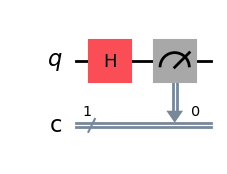

Résultats de mesure : {0: np.float64(0.5), 1: np.float64(0.5)}


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_14748\1359828108.py:19: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


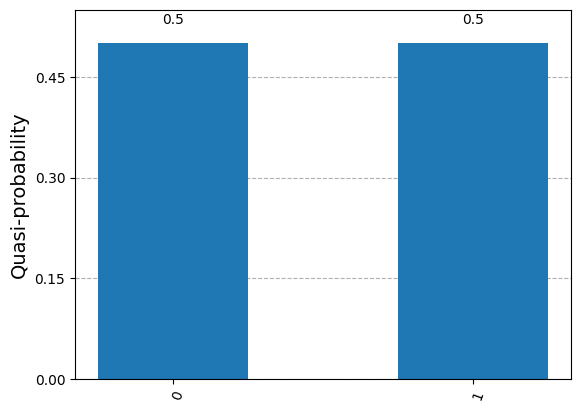

In [17]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

# Étape 1 : Créer un circuit avec 1 qubit et 1 bit classique
qc = QuantumCircuit(1, 1)

# Étape 2 : Appliquer une porte Hadamard pour créer une superposition
qc.h(0)

# Étape 3 : Mesurer le qubit
qc.measure(0, 0)

# Étape 4 : Afficher le schéma du circuit
print("Schéma du circuit :")
display(qc.draw('mpl'))  # Utilise 'mpl' pour une visualisation graphique

# Étape 5 : Simuler le circuit
sampler = Sampler()
job = sampler.run(circuits=[qc])
result = job.result()

# Étape 6 : Afficher les résultats
counts = result.quasi_dists[0]
print("Résultats de mesure :", counts)

# Étape 7 : Afficher les résultats sous forme d'histogramme
plot_histogram(counts)
